In [2]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

#### Probability Density Pictures:
These can be also easily visualized by a "normalized histogram" which gives the 
values with their appropriate probability weightings:

    Examples:
        Fair Coin: 1/2, 1/2
        Unfair Coin: 1/3, 2/3
        Fair Die: 1/6, 1/6, 1/6, 1/6, 1/6, 1/6
        Unfair Die: 1/20, 2/20, 2/20, 2/20, 2/20, 11/20

### Flipping Coin

First, we will demonstrate computing a probability from a sequence of events by simulating a coin flip. In the following code cell, we assume a fixed probability of _flipping heads_, and simulate flipping a heads ($H$) or tails ($T$) by using the [`choice`][npc] function in the NumPy module to randomly select one of these two outcomes. We display the simulated flips, accumulate the number of heads, and display the ratio of heads to total flips as a probability derived from the frequency of occurrences.

In [7]:
#Simulation probability of flipping heads
ph = 0.5

#no of coin flips to simulate
num_flips = 25

#simulate coin flips
def flip_coin(N, p=ph):
    prob = [p, (1-p)]
    return np.random.choice(['H','T'],size=N, p=prob)
    
#Accumulate flips
flips = flip_coin(num_flips, ph)

#Count Heads
num_heads = np.sum(flips == 'H')

#Display results
print("Flips:", " ".join(flips))
print(f"Number of Heads: {num_heads}")
print(f"P(H) = {num_heads/num_flips}  (Number of Heads/ Total Flips)")
    

Flips: T H T H H H H H H T H H T H H H H T T T H T T H T
Number of Heads: 15
P(H) = 0.6  (Number of Heads/ Total Flips)


### Rolling Dice


Second, we can provide a more complex example by simulating the rolling of a six-sided dice. In this case, we must randomly select one of six options ($1$, $2$, $3$, $4$, $5$, $6$), which by default we assume all have equal probabilities ($= 1/ 6$). At the end, we accumulate the number of rolls that result in an _ace_ (or $1$), and display the ratio of this sum to the total number of rolls as a probability derived from the frequency of occurrence.

In [8]:
# Assume equal probability over all states
prob_die = 6 * [(1/6)]

# Number of dice rolls
num_rolls = 25

# Simulate a dice roll
def roll_die(N, prob = prob_die):
    return np.random.choice(['1', '2', '3', '4', '5', '6'], size=N, p=prob)

# Accumulate rolls
rolls=roll_die(num_rolls)

# Accumulate rolls of an 'Ace'
num_ones = np.sum(rolls == '1')

#Display results
print("Rolls:", " ".join(rolls))
print(f"Number of Ones: {num_ones}")
print(f'P(1) = {num_ones/num_rolls} (Number of Ones/Total Rolls)')

Rolls: 5 2 5 6 2 4 2 3 3 2 6 1 4 6 3 5 1 1 2 6 1 2 5 4 5
Number of Ones: 4
P(1) = 0.16 (Number of Ones/Total Rolls)



### Bernoulli Trial

If we conduct an experiment, such as flipping a coin or rolling a die, we can define a specific outcome as a success. For example, if the coin shows a head or we roll an ace (or a **1**), we might consider those successful outcomes. An experiment of this type is known as a [**Bernoulli trial**][wbt]. If the probability of success is denoted by $p$, we have the probability of success as $P(1) = p$, and conversely the probability of failure is $P(0) = (1 - p)$. If we let $x$ be a random variable that is determined by this probability, then $X$ is known as a Bernoulli random variable. In addition, we can obtain the **odds** of a successful outcome as the ratio $p/(1 - p)$.

## Binomial Distribution

If we extend the experiment to include more than one trial, we have a binomial experiment, which consists of a set number of statistically independent _Bernoulli trials_. Thus, flipping a coin multiple times is a binomial experiment, since each coin flip is independent. In general, a random variable that is determined from $n$ statistically independent Bernoulli trials, where each trial has probability $p$ of success, follows a Binomial distribution $B(n, p)$. In this case, the probability of exactly $r$ successes is given by

$$p(r) = {n \choose r} p^r (1 - p)^{n - r}$$

To demonstrate, we can calculate the probability of getting an odd roll of a die. Here the probability of success, $p$ is equal to 0.5, since we have three ways of getting an odd roll and six total options ($p = 3/6 = 1/2$). In addition, we have one trial ($n = 1$), and one success ($r = 1$).

$$P(X) = \frac{1!}{1! 0!}\left( \frac{1}{2} \right)^1 \left( \frac{1}{2} \right)^0 = \frac{1}{2} $$

Or, we can calculate the probability of flipping five heads in ten coin tosses. For this example, the probability of getting heads for a fair coin is just 0.5, $n = 10$, and $r=5$, thus

$$P(X) = \frac{10!}{5! (10 - 5)!}\left( \frac{1}{2} \right)^5 \left( \frac{1}{2} \right)^5 \approx 0.246 $$

This distribution can be applied when
- the different trials (i.e., $n$) are statistically independent,
- each trial can only end in one of two states, and
- the probability of success (and failure) is constant for each trial.

As a simple example, in the following code cell, we calculate the probability of flipping different numbers of heads from five _fair_ coins, for which we assume the probability of getting a heads = 0.5.

-----

<font color='red' size = '5'> Important Information </font>

An important issue that arises when performing data analytic tasks is **reproducibility**. The data analyst should obtain consistent results when performing the same analysis, even if the code, programming language, or analysis tool changes. When working with random variables, however, this can be made more difficult since each time a process is executed entirely new data are generated. 

Computers, however, are entirely deterministic systems. Random data generated by traditional computers are not completely random. These processes often start with a seed, which impacts the random sequence that is generated. By reusing the same seed, one can minimize the impact of a random process within a computer program and enable code reproducibility. This can be done for many random number generators, such as those within NumPy, by explicitly setting a global seed, or, preferentially, always specifying the same [random_state][sst] (or seed) to the specific random generator.

For example, if we are using the binomial distribution in the SciPy module, we can specify the seed globally, or we can specify a random state when we sample random variables from the distribution:

```python
# Set global seed
np.random.seed(42)

# Set repeatable local random state
dist = binom(n, p)
data = dist.rvs(10, random_state=42)
```

P(0 Heads) =   0.03
P(1 Heads) =   0.16
P(2 Heads) =   0.31
P(3 Heads) =   0.31
P(4 Heads) =   0.16
P(5 Heads) =   0.03


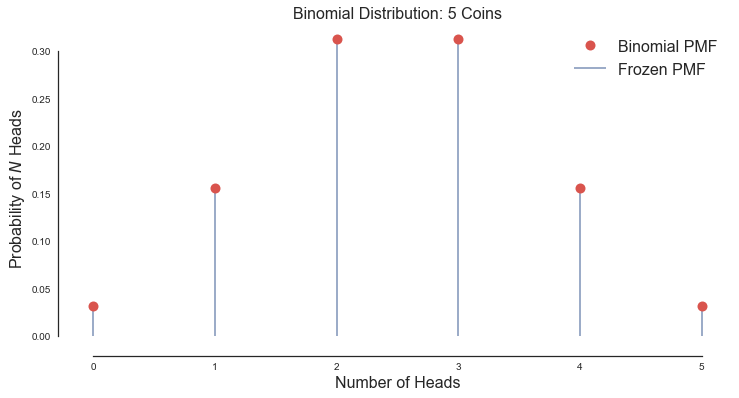

In [9]:
# Number of coins
n = 5

# Simulated probability of heads
ph = 0.5

from scipy.stats import binom

x = np.arange(6)

# Create frozen distribution
rv = binom(n, ph)
pmf = rv.pmf(x)

for idx, pr in enumerate(pmf):
    print(f'P({idx} Heads) = {pr:6.2f}')

# Now plot the binomial distribution for different number of heads in 5 coin flips
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, binom.pmf(x, n, ph), 'o', color=sns.xkcd_rgb["pale red"], ms=10, label='Binomial PMF')

#Plot frozen PMF
ax.vlines(x, 0, pmf, colors=sns.xkcd_rgb["denim blue"], lw=2, alpha=0.5, label='Frozen PMF')

# Decorate plot
ax.set_xlabel('Number of Heads', fontsize=16)
ax.set_ylabel(r'Probability of $N$ Heads', fontsize=16)
ax.set_title('Binomial Distribution: 5 Coins', fontsize=16)
ax.legend(fontsize=16)
sns.despine(offset = 5, trim=True)